In [832]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [833]:
# Read cleaned and balanced data
age_data = pd.read_csv('dt_agedata.csv')

In [834]:
#PRINT ITS SHAPE AND COLUMN NAMES
print(age_data.shape)
print(age_data.columns)

(17, 17)
Index(['Unnamed: 0', 'Offense', 'Under10', 'Under15', 'Under20', 'Under25',
       'Under30', 'Under35', 'Under40', 'Under45', 'Under50', 'Under55',
       'Under60', 'Under65', 'Over65', 'Unknown', 'Crime_Type'],
      dtype='object')


In [835]:
#CLEAN THE DATA
#REMOVE THE FORST COLUMN
age_data = age_data.drop(columns=['Unnamed: 0', 'Offense'])
#CHECK FOR MISSING VALUES
age_data.isnull().sum()

Under10       0
Under15       0
Under20       0
Under25       0
Under30       0
Under35       0
Under40       0
Under45       0
Under50       0
Under55       0
Under60       0
Under65       0
Over65        0
Unknown       0
Crime_Type    0
dtype: int64

In [836]:
#SUMMARIZE THE DATA

age_data_describe = age_data.describe().loc[['min','mean','max']]
age_data_dtype = age_data.dtypes
age_data_describe = age_data_describe.append(age_data_dtype,ignore_index=True)
age_data_describe = age_data_describe.rename(index={0:'min',1:'mean',2:'max',3:'dtype'})
age_data_describe = age_data_describe.transpose()
print(age_data_describe)

               min           mean       max   dtype
Under10       10.0   21119.529412   81158.0   int64
Under15       15.0        39137.0  143951.0   int64
Under20      125.0  102390.764706  256062.0   int64
Under25      349.0  174280.529412  351830.0   int64
Under30      457.0  188563.294118  374771.0   int64
Under35      590.0  177382.941176  347661.0   int64
Under40      680.0  154985.470588  292157.0   int64
Under45      600.0  126095.882353  224222.0   int64
Under50      611.0  106786.352941  175238.0   int64
Under55      619.0        94931.0  163137.0   int64
Under60      581.0   86457.529412  154999.0   int64
Under65      494.0   65247.352941  125770.0   int64
Over65      1263.0  102299.470588  222164.0   int64
Unknown      143.0   18377.823529   32956.0   int64
Crime_Type     NaN            NaN       NaN  object


/var/folders/yc/mphc0tn16cx2tqhspm90bcg80000gn/T/ipykernel_61944/742572884.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_data_describe = age_data_describe.append(age_data_dtype,ignore_index=True)


In [837]:
#THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH CATEGORY
from locale import normalize

Crime_Type_Grave_count = age_data['Crime_Type'].value_counts()['Grave']
Crime_Type_NotGrave_count = age_data['Crime_Type'].value_counts()['NotGrave']
Crime_Type_Grave_norm = age_data['Crime_Type'].value_counts(normalize = True)['Grave']
Crime_Type_NotGrave_norm = age_data['Crime_Type'].value_counts(normalize = True)['NotGrave']

print("Number of points with category Grave: {0:2d} {1:}".format(Crime_Type_Grave_count, Crime_Type_Grave_norm))
print("Number of points with category Not Grave: {0:2d} {1:}".format(Crime_Type_NotGrave_count, Crime_Type_NotGrave_norm))

Number of points with category Grave:  9 0.5294117647058824
Number of points with category Not Grave:  8 0.47058823529411764


In [838]:
#MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="category" COLUMN and X="everything else"
X = age_data.drop(columns = ['Crime_Type'])
Y = age_data['Crime_Type']

In [839]:
#PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.52, random_state=2)

In [840]:
#CONSISTENCY CHECK
print(type(x_train))
print(x_train.shape)
print(type(y_train))
print(y_train.shape)
print(type(x_test))
print(x_test.shape)
print(type(y_test))
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
(8, 14)
<class 'pandas.core.series.Series'>
(8,)
<class 'pandas.core.frame.DataFrame'>
(9, 14)
<class 'pandas.core.series.Series'>
(9,)


In [841]:
# TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [842]:
#MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [843]:
#CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix


def confusion_plot(y_data,y_pred):
    cm = confusion_matrix(y_data, y_pred)
    print('ACCURACY: {:.2f}'.format(accuracy_score(y_data, y_pred)))
    print('NEGATIVE RECALL (Y=0): {:.2f}'.format(recall_score(y_data, y_pred, pos_label='Grave')))
    print('NEGATIVE PRECISION (Y=0): {:.2f}'.format(precision_score(y_data, y_pred, pos_label='Grave')))
    print('POSITIVE RECALL (Y=1): {:.2f}'.format(recall_score(y_data, y_pred, pos_label='Grave')))
    print('POSITIVE PRECISION (Y=1): {:.2f}'.format(precision_score(y_data, y_pred, pos_label='NotGrave')))
    print(cm)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d", )
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

------TEST------
ACCURACY: 1.00
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 1.00
POSITIVE RECALL (Y=1): 1.00
POSITIVE PRECISION (Y=1): 1.00
[[3 0]
 [0 6]]


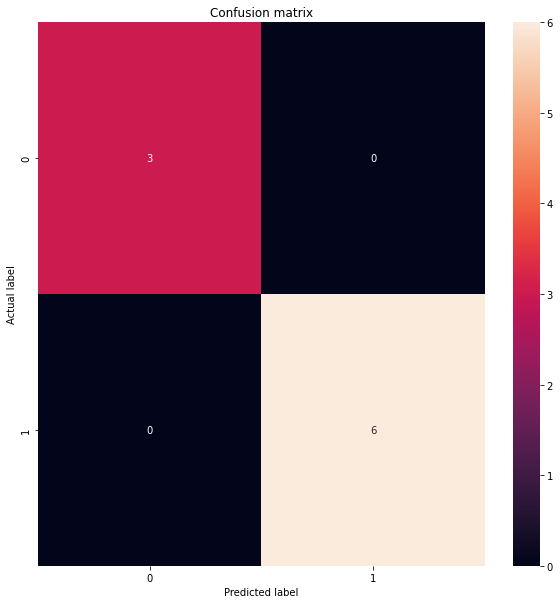

In [844]:
#TEST SET CONFUSION MATRIX
print("------TEST------")
confusion_plot(y_test,yp_test)

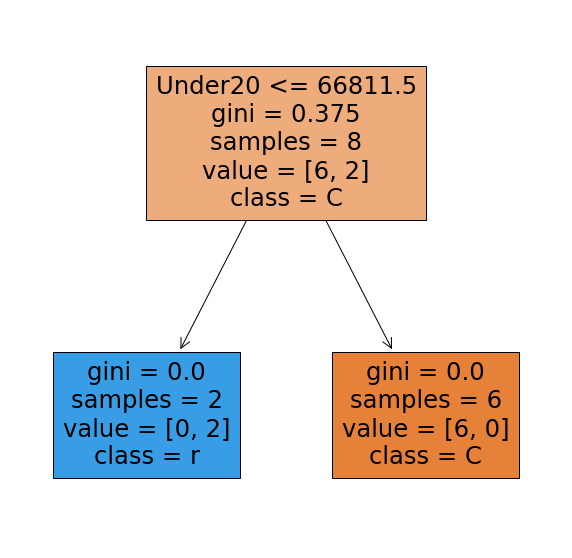

In [845]:
# VISUALIZE THE DECISION TREE 
def plot_tree(model,X,Y):
    plt.figure(figsize=(10,10))
    tree.plot_tree(model, feature_names=X.columns, class_names=Y.name, filled=True)
    plt.show()

plot_tree(model,X,Y)

In [846]:
#HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,17):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label='Grave'),recall_score(y_test, yp_test,pos_label='NotGrave')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label='Grave'),recall_score(y_train, yp_train,pos_label='NotGrave')])



In [847]:
#### TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=2)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TEST------
ACCURACY: 0.78
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 0.60
POSITIVE RECALL (Y=1): 1.00
POSITIVE PRECISION (Y=1): 1.00
[[3 0]
 [2 4]]


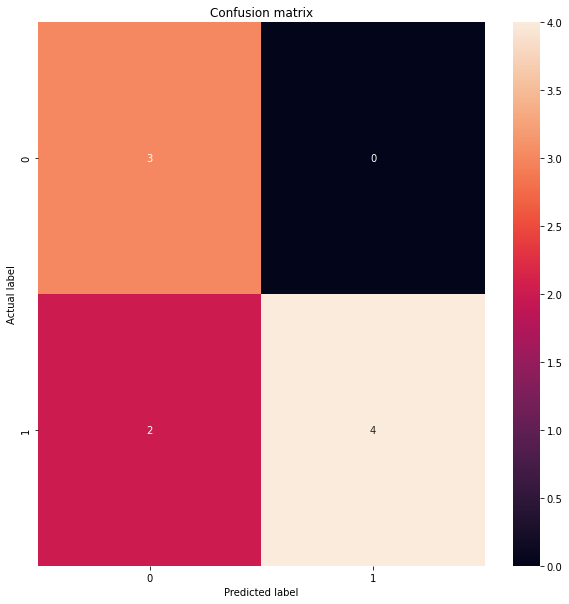

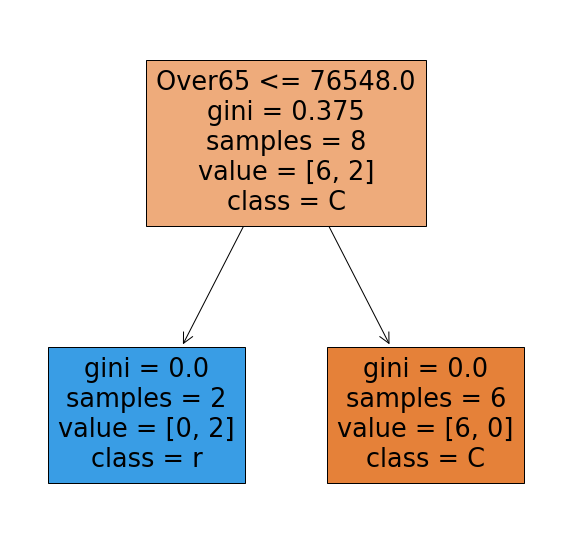

In [848]:
# EVALUATE THE MODEL ON THE TEST SET
print("------TEST------")
confusion_plot(y_test,yp_test)
plot_tree(model,X,Y)